# Getting Started:

#### In this Mini Project for DSC 325 submission, I have used the NFHS-5 dataset to study the key determinants of poor health among children (below the age of 5) and infants (below the age of 6 months) across Indian districts.

### The dataset contains district-level indicators on maternal health, child nutrition, education, sanitation, and access to healthcare services.

### **Objective:**  
To identify the most influential socio-economic and health-related factors affecting child malnutrition indicators — specifically **Anaemia**, **Underweight**, **Wasted**, and **Stunted** percentages — using machine learning techniques and regression analysis.


### Data preprocessing:

In [1]:
import numpy as np
import pandas as pd

# Data Visualization:
import seaborn as sns
from matplotlib import pyplot as plt

# Models:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Data Engineering and Preprocessing:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Metrics:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [ ]:

# child = pd.read_csv(r'C:\Users\mehul\NHFS\Data\childdf.csv')
# factors = pd.read_csv(r'C:\Users\mehul\NHFS\Data\femaledf.csv')

child = pd.read_csv('data/childdf.csv')
factors = pd.read_csv('data/femaledf.csv')

In [3]:
child.head()

,"Total children age 6-23 months receiving an adequate diet16, 17 (%)",Children under 5 years who are stunted (height-for-age)18 (%),Children under 5 years who are wasted (weight-for-height)18 (%),Children under 5 years who are severely wasted (weight-for-height)19 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children under 5 years who are overweight (weight-for-height)20 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%),Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%)
0,18.7,21.6,15.7,24.6,24.6,1.5,37.7,1.8,5.7
1,5.9,27.0,27.0,42.8,42.8,0.8,30.4,7.0,4.5
2,23.5,21.1,12.6,17.4,17.4,7.2,43.4,0.0,6.0
3,16.1,19.7,19.5,21.4,21.4,4.5,59.6,1.3,11.9
4,1.8,36.4,19.2,32.2,32.2,4.7,66.7,1.4,7.5


In [4]:
child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 9 columns):
 #   Column                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                      --------------  -----  
 0   Total children age 6-23 months receiving an adequate diet16, 17  (%)                                                                        706 non-null    float64
 1   Children under 5 years who are stunted (height-for-age)18 (%)                                                                               707 non-null    float64
 2   Children under 5 years who are wasted (weight-for-height)18 (%)                                                                             707 non-null    float64
 3   Children under 5 years who are severely wasted

**Renaming the columns for easy handling of columns**

In [5]:
group1_columns = [
    'Children under 5 years who are stunted (height-for-age)18 (%)',
    'Children under 5 years who are wasted (weight-for-height)18 (%)',
    'Children under 5 years who are severely wasted (weight-for-height)19 (%)',
    'Children under 5 years who are underweight (weight-for-age)18 (%)',
    'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%)'
]

group1_columns = [col for col in group1_columns if col in child.columns]
group1 = child[group1_columns]

In [6]:

group2_columns = [
    'Total children age 6-23 months receiving an adequate diet16, 17  (%)',
    'Children under 5 years who are overweight (weight-for-height)20 (%)'
]
group2 = child[group2_columns]

In [7]:
group1.rename(columns={
    'Children under 5 years who are stunted (height-for-age)18 (%)': 'Stunted',
    'Children under 5 years who are wasted (weight-for-height)18 (%)': 'Wasted',
    'Children under 5 years who are severely wasted (weight-for-height)19 (%)': 'SeverelyWasted',
    'Children under 5 years who are underweight (weight-for-age)18 (%)': 'Underweight',
    'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)': 'Anaemic',
    'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%) ': 'ARI',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) ': 'Diarrhoea'
}, inplace=True)

group2.rename(columns={'Total children age 6-23 months receiving an adequate diet16, 17  (%)': 'AdequateDiet',
    'Children under 5 years who are overweight (weight-for-height)20 (%)': 'Overweight'}, inplace=True)

C:\Users\mehul\AppData\Local\Temp\ipykernel_23704\3476554205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1.rename(columns={
C:\Users\mehul\AppData\Local\Temp\ipykernel_23704\3476554205.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2.rename(columns={'Total children age 6-23 months receiving an adequate diet16, 17  (%)': 'AdequateDiet',


In [8]:
group1.head()

,Stunted,Wasted,SeverelyWasted,Underweight,Anaemic
0,21.6,15.7,24.6,24.6,37.7
1,27.0,27.0,42.8,42.8,30.4
2,21.1,12.6,17.4,17.4,43.4
3,19.7,19.5,21.4,21.4,59.6
4,36.4,19.2,32.2,32.2,66.7


In [9]:
group2.head()

,AdequateDiet,Overweight
0,18.7,1.5
1,5.9,0.8
2,23.5,7.2
3,16.1,4.5
4,1.8,4.7


Group 1 focuses on indicators related to **poor child health outcomes**, such as stunting, wasting, severe wasting, underweight, and anemia among children under 5 years of age. These metrics highlight the prevalence of malnutrition and related health issues.

Group 2, on the other hand, emphasizes **dietary adequacy and overweight prevalence**. It includes indicators like the percentage of children receiving an adequate diet and the percentage of children under 5 years who are overweight. These metrics provide insights into dietary sufficiency and potential overnutrition concerns.

In summary, Group 1 primarily addresses malnutrition and health deficiencies, while Group 2 focuses on dietary adequacy and overnutrition.

### Part-1: factors determining poor child health:

In [10]:
factors.head()

,District Names,State/UT,Female_school ever %,population % electricity,drinking water %,sanitation %,clean fuel %,iodized salt %,Health insurance/finance scheme %,Women literacy %,...,Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%),Women high blood sugar %,Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Women Alcohol %
0,Nicobars,Andaman & Nicobar Islands,78.0,97.9,98.8,83.5,56.9,99.4,2.7,87.5,...,3.9,13.1,23.2,8.5,35.4,13.4,13.2,5.4,63.5,29.6
1,North & Middle Andaman,Andaman & Nicobar Islands,82.7,93.2,92.2,86.4,61.3,99.9,2.1,84.0,...,6.4,16.7,18.4,4.0,27.4,1.7,0.3,15.8,46.8,5.1
2,South Andaman,Andaman & Nicobar Islands,84.7,99.6,97.9,89.3,91.9,99.7,1.2,86.7,...,9.5,18.4,12.7,4.9,23.0,1.3,0.7,8.0,19.6,1.7
3,Srikakulam,Andhra Pradesh,60.0,99.9,87.7,71.6,74.7,76.5,75.6,64.3,...,7.8,17.4,12.8,5.9,22.1,1.0,0.2,3.8,7.1,0.6
4,Vizianagaram,Andhra Pradesh,56.0,99.5,93.1,61.7,60.3,85.0,76.7,58.3,...,7.0,14.3,12.9,6.6,25.2,4.9,0.6,7.3,11.4,0.8


In [11]:
child.rename(columns={
    'Total children age 6-23 months receiving an adequate diet16, 17  (%)': 'AdequateDiet',
    'Children under 5 years who are stunted (height-for-age)18 (%)': 'Stunted',
    'Children under 5 years who are wasted (weight-for-height)18 (%)': 'Wasted',
    'Children under 5 years who are severely wasted (weight-for-height)19 (%)': 'SeverelyWasted',
    'Children under 5 years who are underweight (weight-for-age)18 (%)': 'Underweight',
    'Children under 5 years who are overweight (weight-for-height)20 (%)': 'Overweight',
    'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)': 'Anaemic',
    'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%)': 'ARI',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%)': 'Diarrhoea'
}, inplace=True)

child.rename(columns={'Children Prevalence of symptoms of acute respiratory infection (ARI) in the 2 weeks preceding the survey (Children under age 5 years) (%) ': 'ARI',
    'Prevalence of diarrhoea in the 2 weeks preceding the survey (Children under age 5 years) (%) ': 'Diarrhoea'
}, inplace=True)

Correlation among target columns using Heatmap:

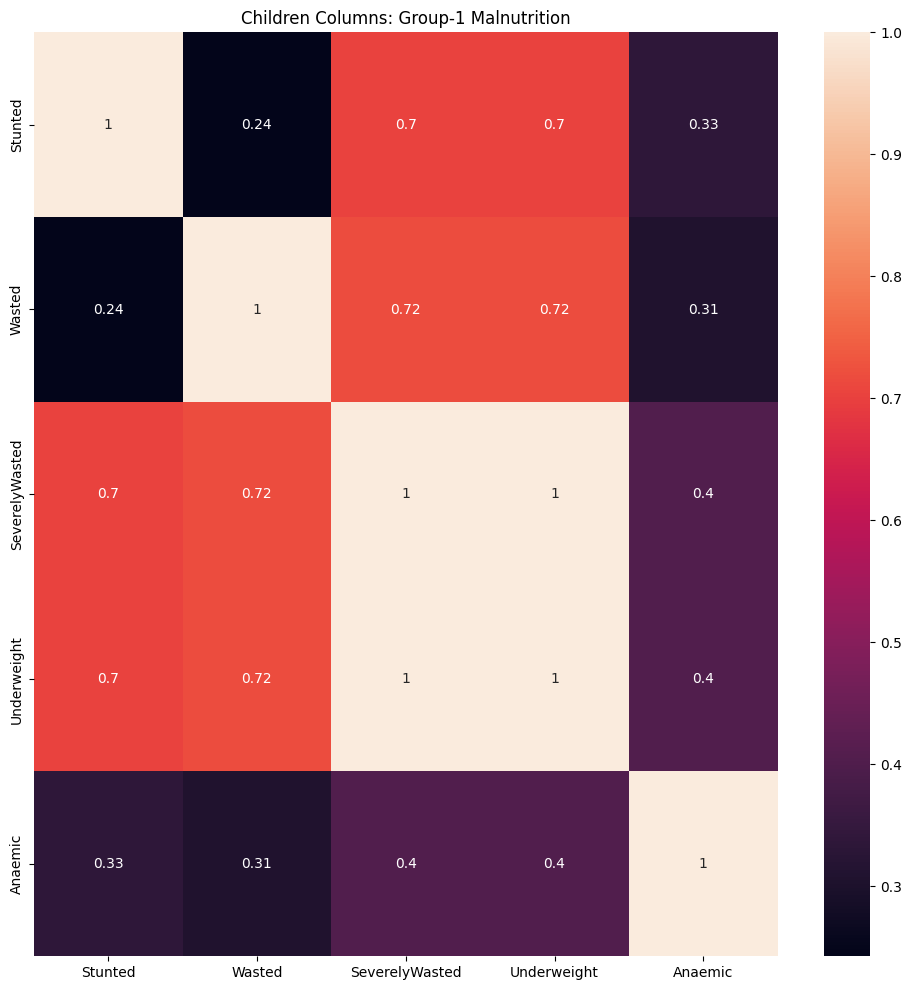

<Figure size 1200x1200 with 0 Axes>

In [12]:
plt.figure(figsize=(12,12))
correlation_mat = group1.corr()
sns.heatmap(correlation_mat, annot=True)
plt.title("Children Columns: Group-1 Malnutrition")

plt.figure(figsize=(12,12))
plt.show()

####### **Since the two target factors: "Severly Wasted" and "Underweight" are correlated with a correlation = 1, we will only consider one factor out of them, Underweight for our study**

In [14]:
factors.head()

,District Names,State/UT,Female_school ever %,population % electricity,drinking water %,sanitation %,clean fuel %,iodized salt %,Health insurance/finance scheme %,Women literacy %,...,Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%),Women high blood sugar %,Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%),Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%),Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%),Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%),Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Women Alcohol %
0,Nicobars,Andaman & Nicobar Islands,78.0,97.9,98.8,83.5,56.9,99.4,2.7,87.5,...,3.9,13.1,23.2,8.5,35.4,13.4,13.2,5.4,63.5,29.6
1,North & Middle Andaman,Andaman & Nicobar Islands,82.7,93.2,92.2,86.4,61.3,99.9,2.1,84.0,...,6.4,16.7,18.4,4.0,27.4,1.7,0.3,15.8,46.8,5.1
2,South Andaman,Andaman & Nicobar Islands,84.7,99.6,97.9,89.3,91.9,99.7,1.2,86.7,...,9.5,18.4,12.7,4.9,23.0,1.3,0.7,8.0,19.6,1.7
3,Srikakulam,Andhra Pradesh,60.0,99.9,87.7,71.6,74.7,76.5,75.6,64.3,...,7.8,17.4,12.8,5.9,22.1,1.0,0.2,3.8,7.1,0.6
4,Vizianagaram,Andhra Pradesh,56.0,99.5,93.1,61.7,60.3,85.0,76.7,58.3,...,7.0,14.3,12.9,6.6,25.2,4.9,0.6,7.3,11.4,0.8


In [ ]:
# Dropping 'State/UT' and 'District Names' columns:
factors_short = factors.drop(columns=['State/UT', 'District Names'])

# Renameing columns with long names to shorter names:
factors_short.rename(columns={
    'Female_school ever %': 'FemaleSchool',
    'population % electricity': 'Electricity',
    'drinking water %': 'DrinkingWater',
    'sanitation %': 'Sanitation',
    'clean fuel %': 'CleanFuel',
    'iodized salt %': 'IodizedSalt',
    'Health insurance/finance scheme %': 'HealthInsurance',
    'Women literacy %': 'WomenLiteracy',
    'Women (age 15-49)  with 10 or more years of schooling (%)': 'WomenSchooling',
    'women child marriage %': 'ChildMarriage',
    'Births in the 5 years preceding the survey that are third or higher order (%)': 'HigherOrderBirths',
    'Women menstural hygiene': 'MenstrualHygiene',
    'Family planning methods %': 'FamilyPlanning',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)': 'ModernFamilyPlanning',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)': 'FemaleSterilization',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)': 'IUD',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)': 'Pill',
    'Total Unmet need for Family Planning (Currently Married Women Age 15-49  years)7 (%)': 'UnmetNeed',
    'Unmet need for spacing (Currently Married Women Age 15-49  years)7 (%)': 'UnmetSpacing',
    'Health worker ever talked to female non-users about family planning (%)': 'HealthWorkerTalk',
    'Mothers who had at least 4 antenatal care visits  (for last birth in the 5 years before the survey) (%)': 'AntenatalCareVisits',
    'Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%)': 'NeonatalTetanus',
    'Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%)': 'IronFolic100Days',
    'Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%)': 'IronFolic180Days',
    'Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%)': 'MCPCard',
    'Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%)': 'PostnatalCare',
    'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)': 'DeliveryCost',
    'Women (age 15-49 years) whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2)21 (%)': 'LowBMI',
    'Women (age 15-49 years) who are overweight or obese (BMI ?25.0 kg/m2)21 (%)': 'OverweightWomen',
    'Women (age 15-49 years) who have high risk waist-to-hip ratio (?0.85) (%)': 'HighWaistHipRatio',
    'Non-pregnant women age 15-49 years who are anaemic (<12.0 g/dl)22 (%)': 'NonPregnantAnaemic',
    'Pregnant women age 15-49 years who are anaemic (<11.0 g/dl)22 (%)': 'PregnantAnaemic',
    'Anaemic women %': 'AnaemicWomen',
    'All women age 15-19 years who are anaemic22 (%)': 'TeenAnaemic',
    'Women  age 15 years and above with high (141-160 mg/dl) Blood sugar level23 (%)': 'HighBloodSugar',
    'Women age 15 years and above wih very high (>160 mg/dl) Blood sugar level23 (%)': 'VeryHighBloodSugar',
    'Women high blood sugar %': 'HighBloodSugarWomen',
    'Women age 15 years and above wih Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%)': 'MildHighBP',
    'Women age 15 years and above wih Moderately or severely elevated blood pressure (Systolic ?160 mm of Hg and/or Diastolic ?100 mm of Hg) (%)': 'SevereHighBP',
    'Women age 15 years and above wih Elevated blood pressure (Systolic ?140 mm of Hg and/or Diastolic ?90 mm of Hg) or taking medicine to control blood pressure (%)': 'ElevatedBP',
    'Women (age 30-49 years) Ever undergone a screening test for cervical cancer (%)': 'CervicalCancerScreening',
    'Women (age 30-49 years) Ever undergone a breast examination for breast cancer (%)': 'BreastCancerScreening',
    'Women (age 30-49 years) Ever undergone an oral cavity examination for oral cancer (%)': 'OralCancerScreening',
    'Women age 15 years and above who use any kind of tobacco (%)': 'TobaccoUse',
    'Women Alcohol %': 'AlcoholUse'
}, inplace=True)

factors_short.head()

,FemaleSchool,Electricity,DrinkingWater,Sanitation,CleanFuel,IodizedSalt,HealthInsurance,WomenLiteracy,WomenSchooling,ChildMarriage,...,VeryHighBloodSugar,HighBloodSugarWomen,MildHighBP,SevereHighBP,ElevatedBP,CervicalCancerScreening,BreastCancerScreening,OralCancerScreening,TobaccoUse,AlcoholUse
0,78.0,97.9,98.8,83.5,56.9,99.4,2.7,87.5,53.5,11.4,...,3.9,13.1,23.2,8.5,35.4,13.4,13.2,5.4,63.5,29.6
1,82.7,93.2,92.2,86.4,61.3,99.9,2.1,84.0,41.0,15.4,...,6.4,16.7,18.4,4.0,27.4,1.7,0.3,15.8,46.8,5.1
2,84.7,99.6,97.9,89.3,91.9,99.7,1.2,86.7,57.5,17.1,...,9.5,18.4,12.7,4.9,23.0,1.3,0.7,8.0,19.6,1.7
3,60.0,99.9,87.7,71.6,74.7,76.5,75.6,64.3,42.5,25.4,...,7.8,17.4,12.8,5.9,22.1,1.0,0.2,3.8,7.1,0.6
4,56.0,99.5,93.1,61.7,60.3,85.0,76.7,58.3,37.6,33.7,...,7.0,14.3,12.9,6.6,25.2,4.9,0.6,7.3,11.4,0.8


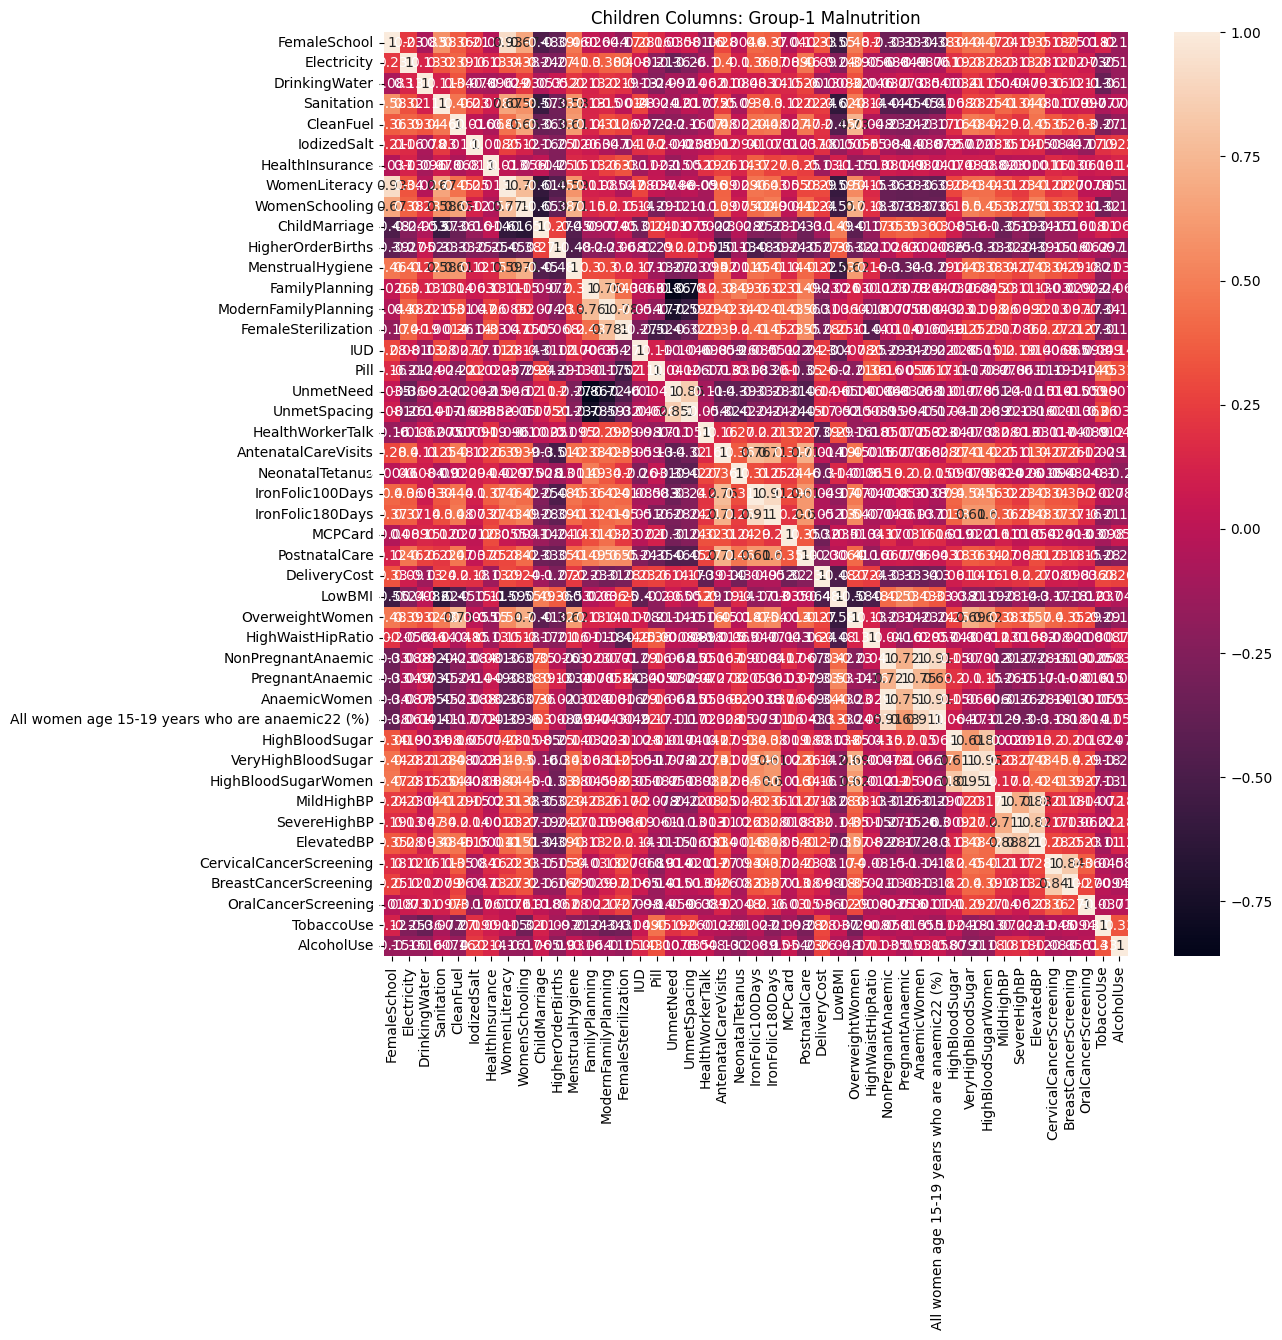

<Figure size 1200x1200 with 0 Axes>

In [16]:
plt.figure(figsize=(12,12))
correlation_mat = factors_short.corr()
sns.heatmap(correlation_mat, annot=True)
plt.title("Children Columns: Group-1 Malnutrition")

plt.figure(figsize=(12,12))
plt.show()

In [18]:
correlation_df = pd.DataFrame(correlation_mat)
correlation_df.head(45)

,FemaleSchool,Electricity,DrinkingWater,Sanitation,CleanFuel,IodizedSalt,HealthInsurance,WomenLiteracy,WomenSchooling,ChildMarriage,...,VeryHighBloodSugar,HighBloodSugarWomen,MildHighBP,SevereHighBP,ElevatedBP,CervicalCancerScreening,BreastCancerScreening,OralCancerScreening,TobaccoUse,AlcoholUse
FemaleSchool,1.000000,0.229251,-0.082762,0.576427,0.358147,0.205678,-0.037458,0.926864,0.665877,-0.478451,...,0.440742,0.468540,0.240395,0.186031,0.346458,0.179694,0.254904,-0.018033,0.120498,-0.150369
Electricity,0.229251,1.000000,0.129226,0.323068,0.394551,0.159860,0.127412,0.335629,0.380227,-0.235185,...,0.279827,0.280685,0.225607,0.131810,0.282908,0.123555,0.120597,0.073341,-0.253877,-0.153043
DrinkingWater,-0.082762,0.129226,1.000000,0.107949,0.335931,-0.078357,-0.096441,-0.029476,0.227556,-0.052904,...,0.214518,0.153298,0.039555,0.046526,0.092543,0.163532,0.117657,0.111769,-0.359408,-0.162708
Sanitation,0.576427,0.323068,0.107949,1.000000,0.460867,0.229442,0.077805,0.665475,0.583021,-0.569965,...,0.280025,0.246710,0.409929,0.342942,0.476841,0.110687,0.079364,0.096656,-0.077359,-0.007391
CleanFuel,0.358147,0.394551,0.335931,0.460867,1.000000,0.016316,-0.067837,0.447324,0.651982,-0.358545,...,0.477537,0.441053,0.288304,0.204819,0.448311,0.350944,0.255820,0.301062,-0.274724,-0.161622
IodizedSalt,0.205678,0.159860,-0.078357,0.229442,0.016316,1.000000,0.017636,0.247692,0.120239,-0.162476,...,-0.021673,0.008254,0.151040,0.140267,0.152550,-0.084206,-0.047172,-0.168152,0.188217,0.223397
HealthInsurance,-0.037458,0.127412,-0.096441,0.077805,-0.067837,0.017636,1.000000,0.013383,-0.056113,0.014179,...,0.080979,0.087946,-0.023463,0.001020,-0.000110,0.159749,0.126737,0.061174,0.090720,0.141858
WomenLiteracy,0.926864,0.335629,-0.029476,0.665475,0.447324,0.247692,0.013383,1.000000,0.774181,-0.606492,...,0.426545,0.436759,0.311222,0.233651,0.411201,0.219962,0.272319,0.007649,0.015419,-0.156406
WomenSchooling,0.665877,0.380227,0.227556,0.583021,0.651982,0.120239,-0.056113,0.774181,1.000000,-0.652333,...,0.503829,0.453920,0.380021,0.270175,0.507819,0.328013,0.320243,0.109400,-0.316814,-0.165995
ChildMarriage,-0.478451,-0.235185,-0.052904,-0.569965,-0.358545,-0.162476,0.014179,-0.606492,-0.652333,1.000000,...,-0.157633,-0.100748,-0.348001,-0.192563,-0.344038,-0.147528,-0.155099,0.018022,0.107709,0.065469


##### Normalizing the features:

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

factors_norm = pd.DataFrame(scaler.fit_transform(factors_short), columns=factors_short.columns)

factors_norm.head()

,FemaleSchool,Electricity,DrinkingWater,Sanitation,CleanFuel,IodizedSalt,HealthInsurance,WomenLiteracy,WomenSchooling,ChildMarriage,...,VeryHighBloodSugar,HighBloodSugarWomen,MildHighBP,SevereHighBP,ElevatedBP,CervicalCancerScreening,BreastCancerScreening,OralCancerScreening,TobaccoUse,AlcoholUse
0,0.605948,0.933544,0.979592,0.768034,0.529605,0.988484,0.015528,0.800327,0.534853,0.197917,...,0.184971,0.321429,0.974227,0.516556,0.800595,0.577586,0.904110,0.341772,0.899291,0.691589
1,0.693309,0.784810,0.867347,0.809052,0.577851,0.998081,0.009317,0.743044,0.367292,0.267361,...,0.329480,0.450000,0.726804,0.218543,0.562500,0.073276,0.020548,1.000000,0.662411,0.119159
2,0.730483,0.987342,0.964286,0.850071,0.913377,0.994242,0.000000,0.787234,0.588472,0.296875,...,0.508671,0.510714,0.432990,0.278146,0.431548,0.056034,0.047945,0.506329,0.276596,0.039720
3,0.271375,0.996835,0.790816,0.599717,0.724781,0.548944,0.770186,0.420622,0.387399,0.440972,...,0.410405,0.475000,0.438144,0.344371,0.404762,0.043103,0.013699,0.240506,0.099291,0.014019
4,0.197026,0.984177,0.882653,0.459689,0.566886,0.712092,0.781573,0.322422,0.321716,0.585069,...,0.364162,0.364286,0.443299,0.390728,0.497024,0.211207,0.041096,0.462025,0.160284,0.018692


##### Feature Selection on Factors Data by removing Near-Constant Features and Highly Correlated Features

In [20]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=0.03)
var_thresh.fit(factors_norm)

print(len(var_thresh.get_feature_names_out()))
print(var_thresh.get_support())
print(len(var_thresh.get_support()))

const_col = [col for col in factors_norm.columns
             if col not in factors_norm.columns[var_thresh.get_support()]]

print(len(const_col))

for feature in const_col :
  print(feature)

17
[ True False False  True  True False  True  True  True  True  True False
 False  True  True False False False False False  True False  True  True
 False  True False  True  True  True False False False False False False
 False False False False False False False False False]
45
28
Electricity
DrinkingWater
IodizedSalt
MenstrualHygiene
FamilyPlanning
IUD
Pill
UnmetNeed
UnmetSpacing
HealthWorkerTalk
NeonatalTetanus
MCPCard
DeliveryCost
NonPregnantAnaemic
PregnantAnaemic
AnaemicWomen
All women age 15-19 years who are anaemic22 (%) 
HighBloodSugar
VeryHighBloodSugar
HighBloodSugarWomen
MildHighBP
SevereHighBP
ElevatedBP
CervicalCancerScreening
BreastCancerScreening
OralCancerScreening
TobaccoUse
AlcoholUse


In [ ]:
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names of correlated columns [Set avoids duplicate values]
  corr_mat = dataset.corr()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i, j]) > threshold: 
        colname = corr_mat.columns[i] # getting the names of the columns
        col_corr.add(colname)
  return col_corr

corr_features = correlation(factors_norm, 0.7)
len(set(corr_features))
print(corr_features)


{'AnaemicWomen', 'FemaleSterilization', 'MenstrualHygiene', 'WomenSchooling', 'UnmetNeed', 'UnmetSpacing', 'OverweightWomen', 'BreastCancerScreening', 'ModernFamilyPlanning', 'ElevatedBP', 'PregnantAnaemic', 'SevereHighBP', 'WomenLiteracy', 'IronFolic100Days', 'PostnatalCare', 'All women age 15-19 years who are anaemic22 (%) ', 'HighBloodSugarWomen', 'IronFolic180Days'}


##### Regarding Feature Selection :

Using feature reduction methods like correlation-based elimination or variance thresholding may not be ideal in this study, as these techniques could inadvertently discard important features that are highly relevant to the target variable, such as **Anaemic Women**. Although some features might show high correlation or low variance, they could still provide crucial insights into the underlying relationships between maternal health and child health outcomes.

In [ ]:
# Checking for NaN values:
nan_counts = factors_norm.isna().sum()

nan_columns = nan_counts[nan_counts > 0]

print("Columns with NaN values and their counts:")
print(nan_columns)

Columns with NaN values and their counts:
HigherOrderBirths      1
DeliveryCost           1
PregnantAnaemic      134
dtype: int64


In [ ]:
# Dropping column with high number of NAN values:
factors_norm.drop(columns=['PregnantAnaemic'], inplace=True)

# Replace NaN values in 'DeliveryCost' and 'HigherOrderBirths' columns with their respective mean
factors_norm['DeliveryCost'].fillna(factors_norm['DeliveryCost'].mean(), inplace=True)
factors_norm['HigherOrderBirths'].fillna(factors_norm['HigherOrderBirths'].mean(), inplace=True)

### Group-1 Factors: Poor Child-health and Malnutrition

**We will try to determine the what health and wellness related factors determine the State of poor health outcomes and deficiencies among children and infants**

In [29]:
group1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Stunted         707 non-null    float64
 1   Wasted          707 non-null    float64
 2   SeverelyWasted  707 non-null    float64
 3   Underweight     707 non-null    float64
 4   Anaemic         707 non-null    float64
dtypes: float64(5)
memory usage: 27.7 KB


#### 

In [30]:
group1.head()

,Stunted,Wasted,SeverelyWasted,Underweight,Anaemic
0,21.6,15.7,24.6,24.6,37.7
1,27.0,27.0,42.8,42.8,30.4
2,21.1,12.6,17.4,17.4,43.4
3,19.7,19.5,21.4,21.4,59.6
4,36.4,19.2,32.2,32.2,66.7


In [31]:
# # Fill NaN values in the 'HigherOrderBirths' column with the mean of the column
# factors_norm['HigherOrderBirths'].fillna(factors_norm['HigherOrderBirths'].mean(), inplace=True)

# # Remove the 'PregnantAnaemic' column
# factors_norm.drop(columns=['PregnantAnaemic'], inplace=True)

#### Target-1: Stundedness percentage:

In [32]:
from sklearn.model_selection import train_test_split

X = factors_norm
y = group1['Stunted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (565, 44)
X_test shape: (142, 44)
y_train shape: (565,)
y_test shape: (142,)


In [33]:
X_train.head()

,FemaleSchool,Electricity,DrinkingWater,Sanitation,CleanFuel,IodizedSalt,HealthInsurance,WomenLiteracy,WomenSchooling,ChildMarriage,...,VeryHighBloodSugar,HighBloodSugarWomen,MildHighBP,SevereHighBP,ElevatedBP,CervicalCancerScreening,BreastCancerScreening,OralCancerScreening,TobaccoUse,AlcoholUse
155,0.384758,0.924051,0.982993,0.579915,0.404605,0.959693,0.425466,0.546645,0.253351,0.439236,...,0.416185,0.417857,0.639175,0.456954,0.497024,0.004310,0.013699,0.000000,0.151773,0.053738
210,0.505576,1.000000,0.620748,0.482320,0.375000,0.923225,0.157350,0.667758,0.439678,0.211806,...,0.109827,0.139286,0.360825,0.132450,0.238095,0.008621,0.013699,0.000000,0.043972,0.002336
260,0.505576,0.971519,0.984694,0.561528,0.571272,0.767754,0.285714,0.538462,0.353887,0.286458,...,0.329480,0.307143,0.350515,0.264901,0.383929,0.008621,0.000000,0.012658,0.129078,0.023364
425,0.724907,0.984177,0.972789,0.690240,0.992325,0.963532,0.305383,0.747954,0.584450,0.222222,...,0.254335,0.271429,0.634021,0.364238,0.514881,0.004310,0.013699,0.000000,0.019858,0.009346
594,0.762082,0.879747,0.585034,0.635078,0.361842,0.984645,0.284679,0.728314,0.135389,0.593750,...,0.381503,0.507143,0.283505,0.251656,0.306548,0.008621,0.000000,0.000000,0.743262,0.142523


##### Identifying relevant features using Recursive Feature Elimination with Cross Validation (RFECV) with Ridge regression:

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Using Ridge regression as the estimator
estimator = Ridge()

# Performing Recursive Feature Elimination with Cross-Validation
selector_rfecv = RFECV(estimator, step=1, cv=5, scoring='r2')
selector_rfecv.fit(X_train, y_train)

# Transforming the training and testing datasets
X_train_new3 = selector_rfecv.transform(X_train)
X_test_new3 = selector_rfecv.transform(X_test)

# Fit the Ridge regression model on the selected features
clf_rfecv = Ridge().fit(X_train_new3, y_train)

# Print selected features and their rankings
print("RFECV with Ridge regression - Selected features: ", selector_rfecv.support_)
print("RFECV with Ridge regression - Feature rankings: ", selector_rfecv.ranking_)

# Print the names of the selected features
selected_features = X_train.columns[selector_rfecv.support_]
print("Selected feature names: ", selected_features)

# Make predictions
y_pred_rfecv = clf_rfecv.predict(X_test_new3)

# Evaluate the model
print("RFECV with Ridge regression - R2 Score: %0.2f" % r2_score(y_test, y_pred_rfecv))
print("RFECV with Ridge regression - Mean Squared Error: %0.2f" % mean_squared_error(y_test, y_pred_rfecv))

RFECV with Ridge regression - Selected features:  [ True  True  True  True  True  True  True False  True False  True  True
  True False  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True]
RFECV with Ridge regression - Feature rankings:  [1 1 1 1 1 1 1 2 1 7 1 1 1 3 1 1 1 1 1 6 1 1 4 1 1 1 1 1 1 1 1 8 1 1 1 1 5
 1 1 1 1 1 1 1]
Selected feature names:  Index(['FemaleSchool', 'Electricity', 'DrinkingWater', 'Sanitation',
       'CleanFuel', 'IodizedSalt', 'HealthInsurance', 'WomenSchooling',
       'HigherOrderBirths', 'MenstrualHygiene', 'FamilyPlanning',
       'FemaleSterilization', 'IUD', 'Pill', 'UnmetNeed', 'UnmetSpacing',
       'AntenatalCareVisits', 'NeonatalTetanus', 'IronFolic180Days', 'MCPCard',
       'PostnatalCare', 'DeliveryCost', 'LowBMI', 'OverweightWomen',
       'HighWaistHipRatio', 'NonPregnantAnaemic',
       'All women age 15-19 years wh

##### **Finding the Features which are negatively correlated using Ridge Regression coeffecients** :

In [38]:
coef = clf_rfecv.coef_

coefficients = pd.DataFrame(coef, index=selected_features, columns=['Coefficient'])

negative_coefficients = coefficients[coefficients['Coefficient'] < 0]

negative_coefficients_sorted = negative_coefficients.sort_values(by='Coefficient', ascending=True)

print("Features with negative coefficients in ascending order:")
print(negative_coefficients_sorted)



Features with negative coefficients in ascending order:
                         Coefficient
OverweightWomen           -18.894010
UnmetSpacing               -6.730746
HealthInsurance            -5.137011
FamilyPlanning             -5.045186
TobaccoUse                 -4.761514
DrinkingWater              -4.239199
SevereHighBP               -3.928705
NeonatalTetanus            -3.096288
Sanitation                 -2.127160
Electricity                -2.070017
IronFolic180Days           -1.939208
MenstrualHygiene           -1.770405
VeryHighBloodSugar         -1.533382
UnmetNeed                  -1.387576
DeliveryCost               -1.386772
WomenSchooling             -1.305835
CervicalCancerScreening    -1.074987
BreastCancerScreening      -1.048732
IUD                        -0.897287


##### **Determining Important features using Random Forest Regressor and Feature Importance Method** :

In [39]:
# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test,y_pred)} RF")


# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

0.4471516404735213 RF
LowBMI                                              0.189910
OverweightWomen                                     0.106605
CleanFuel                                           0.046767
All women age 15-19 years who are anaemic22 (%)     0.029012
DrinkingWater                                       0.027578
NeonatalTetanus                                     0.027533
ModernFamilyPlanning                                0.025617
HighWaistHipRatio                                   0.024025
HealthInsurance                                     0.023365
MenstrualHygiene                                    0.021138
FemaleSterilization                                 0.020439
NonPregnantAnaemic                                  0.019774
AnaemicWomen                                        0.019508
AntenatalCareVisits                                 0.019465
ChildMarriage                                       0.018621
FamilyPlanning                                      0.018502
Po

##### Hence by Random Forest based Feature Importance, these are the top 3 important factors causing stuntedness in children:

- (Negatively correlated) Mensural Hygiene:  Sign of overall health and sanitation awareness among Mothers, which also reflects on growth of children

- Low BMI: Strong indicator of how Malnutrician in Mothers reflect in the form of Stuntedness in children.

- (Negatively correlated) Women Literacy: Literacy often correlates with better maternal care, nutrition awareness, and healthcare access.

#### Target-2: Percentage Wasted

In [40]:
X = factors_norm
y = group1['Wasted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (565, 44)
X_test shape: (142, 44)
y_train shape: (565,)
y_test shape: (142,)


In [41]:
# Use Ridge regression as the estimator
estimator = Ridge()

# Perform Recursive Feature Elimination with Cross-Validation
selector_rfecv = RFECV(estimator, step=1, cv=5, scoring='r2')
selector_rfecv.fit(X_train, y_train)

# Transform the training and testing datasets
X_train_new3 = selector_rfecv.transform(X_train)
X_test_new3 = selector_rfecv.transform(X_test)

# Fit the Ridge regression model on the selected features
clf_rfecv = Ridge().fit(X_train_new3, y_train)

# Print selected features
print("RFECV with Ridge regression - Selected features: ", selector_rfecv.support_)

# Make predictions
y_pred_rfecv = clf_rfecv.predict(X_test_new3)

# Evaluate the model
print("RFECV with Ridge regression - R2 Score: %0.2f" % r2_score(y_test, y_pred_rfecv))
print("RFECV with Ridge regression - Mean Squared Error: %0.2f" % mean_squared_error(y_test, y_pred_rfecv))

RFECV with Ridge regression - Selected features:  [ True  True  True  True  True  True  True False  True False  True  True
  True False  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True]
RFECV with Ridge regression - R2 Score: 0.38
RFECV with Ridge regression - Mean Squared Error: 21.76


In [42]:
coef = clf_rfecv.coef_

# Ensure the indices of the coefficients match the selected features
selected_features_corrected = X_train.columns[selector_rfecv.support_]
coefficients = pd.DataFrame(coef, index=selected_features_corrected, columns=['Coefficient'])

negative_coefficients = coefficients[coefficients['Coefficient'] < 0]

negative_coefficients_sorted = negative_coefficients.sort_values(by='Coefficient', ascending=True)

print("Features with negative coefficients in ascending order:")
print(negative_coefficients_sorted)

Features with negative coefficients in ascending order:
                         Coefficient
OverweightWomen           -18.894010
UnmetSpacing               -6.730746
HealthInsurance            -5.137011
FamilyPlanning             -5.045186
TobaccoUse                 -4.761514
DrinkingWater              -4.239199
SevereHighBP               -3.928705
NeonatalTetanus            -3.096288
Sanitation                 -2.127160
Electricity                -2.070017
IronFolic180Days           -1.939208
MenstrualHygiene           -1.770405
VeryHighBloodSugar         -1.533382
UnmetNeed                  -1.387576
DeliveryCost               -1.386772
WomenSchooling             -1.305835
CervicalCancerScreening    -1.074987
BreastCancerScreening      -1.048732
IUD                        -0.897287


In [43]:
# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test,y_pred)} RF")


# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

0.4056468234641041 RF
LowBMI                                              0.204346
OverweightWomen                                     0.094753
CleanFuel                                           0.042579
ModernFamilyPlanning                                0.032963
All women age 15-19 years who are anaemic22 (%)     0.028057
HealthInsurance                                     0.026912
NeonatalTetanus                                     0.026251
DrinkingWater                                       0.025739
AnaemicWomen                                        0.022878
HighWaistHipRatio                                   0.021844
NonPregnantAnaemic                                  0.020578
MenstrualHygiene                                    0.019849
AntenatalCareVisits                                 0.018603
Pill                                                0.017886
WomenSchooling                                      0.017785
FemaleSterilization                                 0.017580
Io

**Although the overall R2 score for the whole regression over Wasted Percentage is coming out to be <0.5 , which means our model is unable to learn the variance in target with the given features**

We can still infer the top factors contributing to occurence Wasted percentage in Children:

- Low BMI: Malnutrition among Mother directly reflects into Wastedness and Stuntedness in children.
- (Negatively Correlated) Overweightness in Women : Inversly related feature

#### Target-3: Percentage Underwieght (for children below 5 years of age):

In [44]:
X = factors_norm
y = group1['Underweight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (565, 44)
X_test shape: (142, 44)
y_train shape: (565,)
y_test shape: (142,)


In [45]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Use Ridge regression as the estimator
estimator = Ridge()

# Perform Recursive Feature Elimination with Cross-Validation
selector_rfecv = RFECV(estimator, step=1, cv=5, scoring='r2')
selector_rfecv.fit(X_train, y_train)

# Transform the training and testing datasets
X_train_new3 = selector_rfecv.transform(X_train)
X_test_new3 = selector_rfecv.transform(X_test)

# Fit the Ridge regression model on the selected features
clf_rfecv = Ridge().fit(X_train_new3, y_train)

# Print selected features and their rankings
print("RFECV with Ridge regression - Selected features: ", selector_rfecv.support_)
print("RFECV with Ridge regression - Feature rankings: ", selector_rfecv.ranking_)

# Print the names of the selected features
selected_features = X_train.columns[selector_rfecv.support_]
print("Selected feature names: ", selected_features)

# Make predictions
y_pred_rfecv = clf_rfecv.predict(X_test_new3)

# Evaluate the model
print("RFECV with Ridge regression - R2 Score: %0.2f" % r2_score(y_test, y_pred_rfecv))
print("RFECV with Ridge regression - Mean Squared Error: %0.2f" % mean_squared_error(y_test, y_pred_rfecv))

RFECV with Ridge regression - Selected features:  [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False False False
  True False  True  True  True False  True  True False  True False  True
  True  True  True  True False  True  True  True]
RFECV with Ridge regression - Feature rankings:  [ 1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1  3  4  8
  1  6  1  1  1  7  1  1 10  1  9  1  1  1  1  1  5  1  1  1]
Selected feature names:  Index(['FemaleSchool', 'Electricity', 'DrinkingWater', 'Sanitation',
       'CleanFuel', 'IodizedSalt', 'HealthInsurance', 'WomenLiteracy',
       'ChildMarriage', 'HigherOrderBirths', 'MenstrualHygiene',
       'FamilyPlanning', 'ModernFamilyPlanning', 'FemaleSterilization', 'IUD',
       'Pill', 'UnmetNeed', 'UnmetSpacing', 'HealthWorkerTalk',
       'AntenatalCareVisits', 'MCPCard', 'DeliveryCost', 'LowBMI',
       'OverweightWomen', 'NonPregnantAnaemic', 'AnaemicW

In [46]:
coef = clf_rfecv.coef_

coefficients = pd.DataFrame(coef, index=selected_features, columns=['Coefficient'])

negative_coefficients = coefficients[coefficients['Coefficient'] < 0]

negative_coefficients_sorted = negative_coefficients.sort_values(by='Coefficient', ascending=True)

print("Features with negative coefficients in ascending order:")
print(negative_coefficients_sorted)

Features with negative coefficients in ascending order:
                         Coefficient
OverweightWomen           -19.306661
HealthInsurance            -6.895124
FamilyPlanning             -5.739105
TobaccoUse                 -5.594124
UnmetSpacing               -5.162715
ModernFamilyPlanning       -4.932772
Electricity                -4.800334
UnmetNeed                  -4.598277
DeliveryCost               -4.422352
SevereHighBP               -3.984742
MenstrualHygiene           -3.930366
WomenLiteracy              -3.671251
IodizedSalt                -2.899122
Sanitation                 -2.127304
CervicalCancerScreening    -1.939232
DrinkingWater              -1.752545
ElevatedBP                 -1.382337


In [47]:
# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test,y_pred)} RF")


# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

0.6838471073429666 RF
LowBMI                                              0.554032
MenstrualHygiene                                    0.037804
ChildMarriage                                       0.025416
HealthInsurance                                     0.020814
DeliveryCost                                        0.018404
OverweightWomen                                     0.018131
UnmetNeed                                           0.017111
CleanFuel                                           0.016247
Sanitation                                          0.015951
WomenLiteracy                                       0.014950
Electricity                                         0.014809
SevereHighBP                                        0.014426
TobaccoUse                                          0.011902
HealthWorkerTalk                                    0.011626
NeonatalTetanus                                     0.010738
All women age 15-19 years who are anaemic22 (%)     0.009371
An

##### For the target feature of Percentage of Underweight Children, our model worked quite satisfactorily and gave a R2 Score of 0.69 ~ 70%.

Top features affecting Underweight Percentage in Children below 5 years of age:

- Low BMI in Mothers: strongest factor for Underweight Children
- (Negatively Correlated with target) Menstural Hygiene
- Child Marriage : Early marriage is associated with early and high-risk pregnancies, often leading to low birth weight and underweight children
- Overweightness in Women : Inversly related feature

#### Target-4: Anaemia Percentage (District-wise) in Children:

In [48]:
X = factors_norm
y = group1['Anaemic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (565, 44)
X_test shape: (142, 44)
y_train shape: (565,)
y_test shape: (142,)


In [49]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Use Ridge regression as the estimator
estimator = Ridge()

# Perform Recursive Feature Elimination with Cross-Validation
selector_rfecv = RFECV(estimator, step=1, cv=5, scoring='r2')
selector_rfecv.fit(X_train, y_train)

# Transform the training and testing datasets
X_train_new3 = selector_rfecv.transform(X_train)
X_test_new3 = selector_rfecv.transform(X_test)

# Fit the Ridge regression model on the selected features
clf_rfecv = Ridge().fit(X_train_new3, y_train)

# Print selected features and their rankings
print("RFECV with Ridge regression - Selected features: ", selector_rfecv.support_)
print("RFECV with Ridge regression - Feature rankings: ", selector_rfecv.ranking_)

# Print the names of the selected features
selected_features = X_train.columns[selector_rfecv.support_]
print("Selected feature names: ", selected_features)

# Make predictions
y_pred_rfecv = clf_rfecv.predict(X_test_new3)

# Evaluate the model
print("RFECV with Ridge regression - R2 Score: %0.2f" % r2_score(y_test, y_pred_rfecv))
print("RFECV with Ridge regression - Mean Squared Error: %0.2f" % mean_squared_error(y_test, y_pred_rfecv))

RFECV with Ridge regression - Selected features:  [False False  True False  True False False False  True False False  True
 False  True  True  True False False False False False False False False
 False False False  True False False  True  True  True  True False  True
 False False False False False  True  True False]
RFECV with Ridge regression - Feature rankings:  [16 30  1  9  1 18 14 25  1 15 11  1  4  1  1  1 27 23 24 17  3 29  2 21
 26 20 22  1 28  6  1  1  1  1  5  1 10 12 19  7  8  1  1 13]
Selected feature names:  Index(['DrinkingWater', 'CleanFuel', 'WomenSchooling', 'MenstrualHygiene',
       'ModernFamilyPlanning', 'FemaleSterilization', 'IUD', 'LowBMI',
       'NonPregnantAnaemic', 'AnaemicWomen',
       'All women age 15-19 years who are anaemic22 (%) ', 'HighBloodSugar',
       'HighBloodSugarWomen', 'OralCancerScreening', 'TobaccoUse'],
      dtype='object')
RFECV with Ridge regression - R2 Score: 0.63
RFECV with Ridge regression - Mean Squared Error: 58.86


In [50]:
# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test,y_pred)} RF")


# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

0.6787550926936854 RF
All women age 15-19 years who are anaemic22 (%)     0.338713
AnaemicWomen                                        0.090277
NonPregnantAnaemic                                  0.072997
FemaleSchool                                        0.046343
UnmetNeed                                           0.023031
IronFolic100Days                                    0.021751
LowBMI                                              0.021609
VeryHighBloodSugar                                  0.020961
UnmetSpacing                                        0.019342
HighWaistHipRatio                                   0.018539
IodizedSalt                                         0.018289
DeliveryCost                                        0.014928
MenstrualHygiene                                    0.014525
Pill                                                0.014184
HighBloodSugarWomen                                 0.013548
HigherOrderBirths                                   0.012973
Hi

In [51]:
coef = clf_rfecv.coef_

coefficients = pd.DataFrame(coef, index=selected_features, columns=['Coefficient'])

negative_coefficients = coefficients[coefficients['Coefficient'] < 0]

negative_coefficients_sorted = negative_coefficients.sort_values(by='Coefficient', ascending=True)

print("Features with negative coefficients in ascending order:")
print(negative_coefficients_sorted)

Features with negative coefficients in ascending order:
                     Coefficient
WomenSchooling        -12.015844
HighBloodSugarWomen   -11.784511
TobaccoUse             -8.333863
IUD                    -8.046427
OralCancerScreening    -7.992213
HighBloodSugar         -7.087838
MenstrualHygiene       -5.858859
FemaleSterilization    -5.708822


In [52]:
# Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test,y_pred)} RF")


# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)

0.6475678136515246 RF
All women age 15-19 years who are anaemic22 (%)     0.291116
NonPregnantAnaemic                                  0.134939
AnaemicWomen                                        0.087256
FemaleSchool                                        0.047079
LowBMI                                              0.024579
IronFolic100Days                                    0.021816
VeryHighBloodSugar                                  0.019620
DeliveryCost                                        0.018597
UnmetSpacing                                        0.018500
UnmetNeed                                           0.018341
IodizedSalt                                         0.017824
HighWaistHipRatio                                   0.015293
HighBloodSugar                                      0.014656
CleanFuel                                           0.014512
Pill                                                0.013830
HighBloodSugarWomen                                 0.013269
Me

##### Top features affecting Anaemia percentage among Children (below the age of 5) are :

- Strongest factor -> women age 15-19 years who are anaemic22 : Iron and other deficiencies passes on to children
- Percentage of Females who have attended school : Access to education reflects in deficiencies prevention. 
- Unmet Spacing/ unmet needs: high percentage of unment needs for family planning indicates lack in access to health and family planning schemes by goverenement.


# Final outcomes of the project:

##  Summary of Key Findings

This study explored the relationship between various **maternal and female-centric health, education, and socio-economic indicators** with key child health outcomes, including **Anaemia, Underweight, Wastedness, and Stuntedness** in children under the age of 5.

###  1. Anaemia in Children

- The **strongest predictor** of child anaemia is the percentage of **anaemic women aged 15–19**, highlighting intergenerational transfer of nutritional deficiencies.
- **Female education** (school attendance) emerged as a key factor, suggesting that **awareness and knowledge** play a major role in addressing deficiencies.
- **Unmet spacing and family planning needs** also showed positive correlation, indicating systemic gaps in access to reproductive health services.

###  2. Underweight Children

- The model performed well with an **R² score of ~0.70**, indicating good predictive ability.
- **Low BMI in mothers** is the **strongest contributor** to underweight children, reinforcing the role of maternal nutrition.
- **Menstrual hygiene** and **overweight women** showed **negative correlation**, possibly indicating that general health awareness and maternal metabolic status affect child nutrition.
- **Child marriage** was also a significant factor, aligning with known risks of early pregnancies on child health.

###  3. Wasted Children

- Although the model had **low predictive performance (R² < 0.5)**, some insights can still be drawn.
- **Low maternal BMI** continues to be a key factor, reinforcing the importance of maternal nutrition.
- **Overweightness in women** had a **negative correlation**, suggesting that maternal undernutrition rather than overnutrition is the primary concern.

###  4. Stunted Children

- Feature importance from a **Random Forest model** highlighted:
  - **Menstrual hygiene** (negatively correlated): Indicator of maternal health and sanitation awareness.
  - **Low BMI**: Again confirmed as a critical factor for child growth issues.
  - **Women literacy** (negatively correlated): Suggests that educated mothers are better equipped to ensure healthy child development.

---

###  Conclusion

Maternal health, education, and access to services directly impact child health outcomes. Across all target features, **Low BMI among mothers consistently appeared as the strongest risk factor**, while indicators of **empowerment and awareness** (literacy, hygiene, reproductive agency) showed significant protective correlations. This underscores the importance of **holistic interventions targeting women’s health and education** for improving child nutrition and development outcomes.
